Analysis of sentiment using NLP for Flipkart Reviews

Importing the neccessary libraries

In [20]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection for Flipkart Reviews is collected from Kaggle (Flipkart Product Reviews)

In [21]:
dataset = pd.read_csv('Dataset.csv',encoding='latin-1')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6100\1303051345.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('Dataset.csv',encoding='latin-1')


In [22]:
dataset

,Product_name,Price,Rate,Review,Summary
0,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Nice product,A Good cooler by Crompton. The height of the c...
...,...,...,...,...,...
363256,"NIVEA Soft Light Moisturizer for Face, Hand & ...",??142,5.0,Terrific,Thanks
363257,"NIVEA Soft Light Moisturizer for Face, Hand & ...",??142,5.0,Terrific,Good
363258,"NIVEA Soft Light Moisturizer for Face, Hand & ...",??142,5.0,Just wow!,Super
363259,"NIVEA Soft Light Moisturizer for Face, Hand & ...",??142,4.0,Worth the money,Good


In [23]:
dataset.shape

(363261, 5)

The Dataset contains about 363260 rows and 5 columns as features
Analyzing the dataset and adding a column of serial numbers of persons in the dataset 

In [24]:
dataset['Id'] = range(1,363262)
dataset = dataset.merge(dataset['Id'], how='left')

In [25]:
dataset

,Product_name,Price,Rate,Review,Summary,Id
0,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Simply awesome,it's really worth every single penny. it works...,1
1,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...,2
2,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Worth every penny,GREAT packaging by seller. As this was the mos...,3
3,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Fabulous!,Delivery was delayed by two days except this e...,4
4,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Nice product,A Good cooler by Crompton. The height of the c...,5
...,...,...,...,...,...,...
363256,"NIVEA Soft Light Moisturizer for Face, Hand & ...",??142,5.0,Terrific,Thanks,363257
363257,"NIVEA Soft Light Moisturizer for Face, Hand & ...",??142,5.0,Terrific,Good,363258
363258,"NIVEA Soft Light Moisturizer for Face, Hand & ...",??142,5.0,Just wow!,Super,363259
363259,"NIVEA Soft Light Moisturizer for Face, Hand & ...",??142,4.0,Worth the money,Good,363260


As dataset has about shape of (363261,5) I take 17000 to train and predict the sentiment 

In [26]:
datarows = dataset.head(17000)

In [27]:
datarows

,Product_name,Price,Rate,Review,Summary,Id
0,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Simply awesome,it's really worth every single penny. it works...,1
1,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...,2
2,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Worth every penny,GREAT packaging by seller. As this was the mos...,3
3,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Fabulous!,Delivery was delayed by two days except this e...,4
4,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Nice product,A Good cooler by Crompton. The height of the c...,5
...,...,...,...,...,...,...
16995,FLIPZON Baby 6 Shelve Unbreakable Material PVC...,"??1,095",5,Classy product,Super space saving product,16996
16996,FLIPZON Baby 6 Shelve Unbreakable Material PVC...,"??1,095",4,Value-for-money,Nice one,16997
16997,FLIPZON Baby 6 Shelve Unbreakable Material PVC...,"??1,095",5,Just wow!,Love it...nice ..,16998
16998,FLIPZON Baby 6 Shelve Unbreakable Material PVC...,"??1,095",4,Pretty good,"Nice products,,",16999


Basic NLTK preprocessing steps (tokenization,pos_tag,chunking)
We take some random example product review from the dataset and perform preprocessing 

In [28]:
us = datarows.Summary[3]

Tokenization is the breaking down of words in a sentence

In [29]:
 bu = nltk.word_tokenize(us)
 bu[:10]

['Delivery',
 'was',
 'delayed',
 'by',
 'two',
 'days',
 'except',
 'this',
 'everything',
 'is']

pos_tag refers to the part of speech.As tokenized is further identified the pos_tag.For every keyword there is a grammer abbreviated.Available in pos_tag comments in google

In [30]:
bi = nltk.pos_tag(bu)
bi[:10]

[('Delivery', 'NN'),
 ('was', 'VBD'),
 ('delayed', 'VBN'),
 ('by', 'IN'),
 ('two', 'CD'),
 ('days', 'NNS'),
 ('except', 'IN'),
 ('this', 'DT'),
 ('everything', 'NN'),
 ('is', 'VBZ')]

 Counting of the dataset with xcoordinate as Rate of the review

<Axes: xlabel='Rate', ylabel='count'>

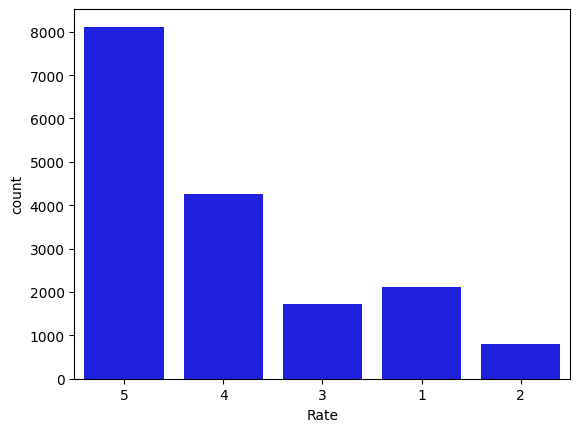

In [31]:
sns.countplot(color='Blue',x='Rate',data=datarows)

VADER MODEL FOR SENTIMENT ANALYSIS

-> Vader Model works based on the bag of words approach.For example 'happy' is a positive word and when adding negation becomes negative

-> Vader Model is a NLTK Module and pre trained. It provides the sentiment analysis based on the polarity scores
(positive,negative,neutral or compound).It gives the percentage of the every polarity score

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [33]:
sia = SentimentIntensityAnalyzer()

Sample working of the VADER MODEL


In [34]:
rs = datarows.Summary[3]
rs

'Delivery was delayed by two days except this everything is quite fine.safely packed.air flow is good run silently even on full (3) speedice chamber is pretty good and instantly starts giving cool air after putting ice in it.connecting wire is kind of short length.A foul smell comes for the first time you put water in it.but it ended within 3-4 hrs.moving wheels are quite reliablewheel lock works good.'

In [35]:
sample = sia.polarity_scores(rs)
sample

{'neg': 0.024, 'neu': 0.767, 'pos': 0.209, 'compound': 0.9287}

<Axes: >

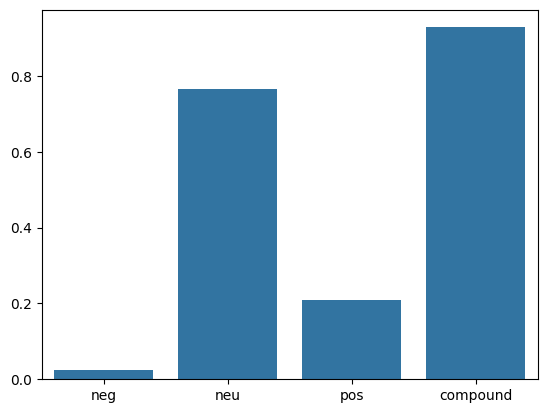

In [36]:
sns.barplot(sample)

Prediction on the entire dataset.

In [37]:
result = {}
for i, row in tqdm(datarows.iterrows(),total=len(datarows)):
    text = row['Summary']
    id = row['Id']
    result[id] = sia.polarity_scores(text)

  0%|          | 0/17000 [00:00<?, ?it/s]

In [38]:
result

{1: {'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.984},
 2: {'neg': 0.049, 'neu': 0.758, 'pos': 0.193, 'compound': 0.9257},
 3: {'neg': 0.017, 'neu': 0.797, 'pos': 0.186, 'compound': 0.9343},
 4: {'neg': 0.024, 'neu': 0.767, 'pos': 0.209, 'compound': 0.9287},
 5: {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.9587},
 6: {'neg': 0.023, 'neu': 0.723, 'pos': 0.254, 'compound': 0.9757},
 7: {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.9868},
 8: {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.974},
 9: {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9562},
 10: {'neg': 0.018, 'neu': 0.743, 'pos': 0.239, 'compound': 0.9748},
 11: {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.9397},
 12: {'neg': 0.126, 'neu': 0.711, 'pos': 0.163, 'compound': 0.4833},
 13: {'neg': 0.137, 'neu': 0.82, 'pos': 0.042, 'compound': -0.5103},
 14: {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.6486},
 15: {'neg': 0.042, 'neu': 0.818, 'pos': 0.141, 'compound':

Adding the polarity scores rows to the dataset

In [39]:
datas = pd.DataFrame(result).T
datas = datas.reset_index().rename(columns={'index' : 'Id'})
datas = datas.merge(datarows, how='left')

In [40]:
datas

,Id,neg,neu,pos,compound,Product_name,Price,Rate,Review,Summary
0,1,0.000,0.689,0.311,0.9840,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Simply awesome,it's really worth every single penny. it works...
1,2,0.049,0.758,0.193,0.9257,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,3,0.017,0.797,0.186,0.9343,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,4,0.024,0.767,0.209,0.9287,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Fabulous!,Delivery was delayed by two days except this e...
4,5,0.000,0.805,0.195,0.9587,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Nice product,A Good cooler by Crompton. The height of the c...
...,...,...,...,...,...,...,...,...,...,...
16995,16996,0.000,0.435,0.565,0.5994,FLIPZON Baby 6 Shelve Unbreakable Material PVC...,"??1,095",5,Classy product,Super space saving product
16996,16997,0.000,0.263,0.737,0.4215,FLIPZON Baby 6 Shelve Unbreakable Material PVC...,"??1,095",4,Value-for-money,Nice one
16997,16998,0.000,0.323,0.677,0.6369,FLIPZON Baby 6 Shelve Unbreakable Material PVC...,"??1,095",5,Just wow!,Love it...nice ..
16998,16999,0.000,0.263,0.737,0.4215,FLIPZON Baby 6 Shelve Unbreakable Material PVC...,"??1,095",4,Pretty good,"Nice products,,"


Plotting of the polarity scores positive negative neutral and compound with Rate of the Review of the entire dataset

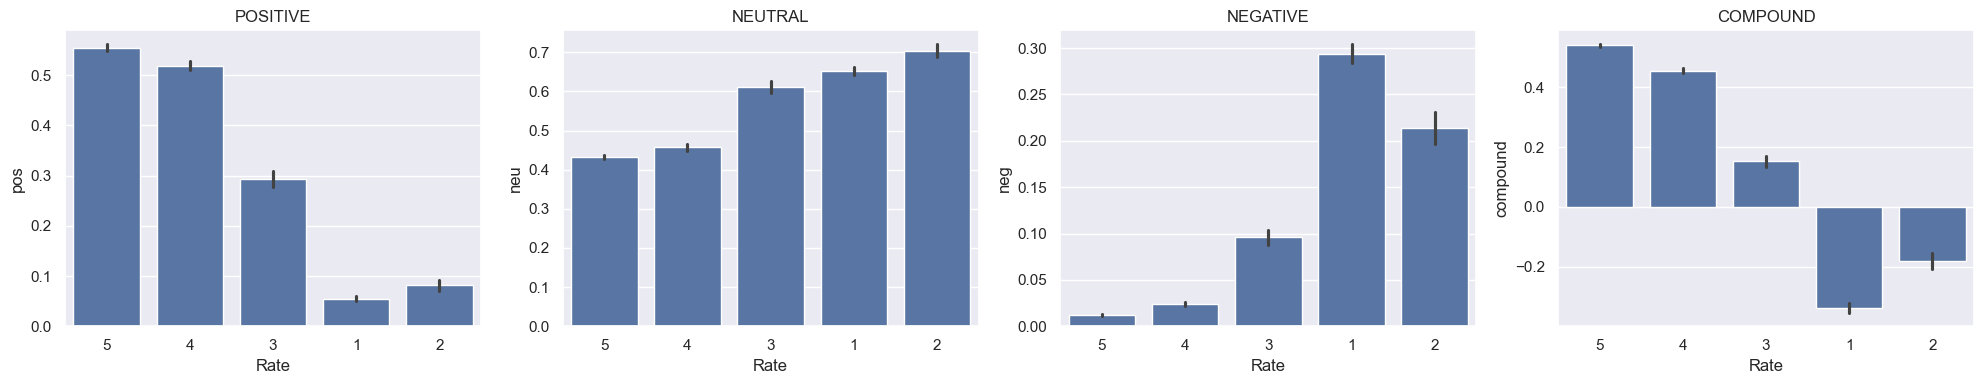

In [41]:
sns.set_theme()
fig, axs = plt.subplots(1,4,figsize=(20,4))
sns.barplot(data=datas, x='Rate', y ='pos', ax=axs[0])
sns.barplot(data=datas,x='Rate',y='neu',ax=axs[1])
sns.barplot(data=datas,x='Rate',y='neg',ax=axs[2])
sns.barplot(data=datas,x='Rate',y='compound',ax=axs[3])
axs[0].set_title('POSITIVE')
axs[1].set_title('NEUTRAL')
axs[2].set_title('NEGATIVE')
axs[3].set_title('COMPOUND')
plt.tight_layout()
plt.show()